# <center><font color='Crimson' style="font-size:40px"><b>Exercises 1</b></font></center>

## <font color='Tomato'><b>1. Utility based portfolio optimization with sqare root function</b></font>

Suppose that (1) on the market exist **one risky and one riskless assets** and that (2) there are **only two possible states of nature** (3) which are **equally probable**. At time 0, price of the risky stock is 50 dollars while riskless asset offers return of 5% per period. Payoffs of both stocks are presented on binomial tree given below:

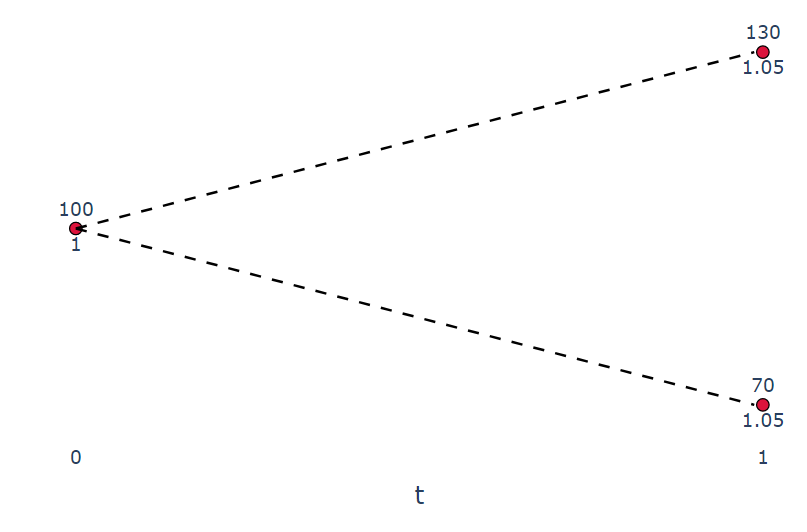

Investor has following **utility function**:

$$u(W)=\sqrt{W}$$

### A

a) If investor plans to **invest 10 000 dollars** of his initial wealth, what would be his/hers **optimal portfolio** in terms of **weights** (i.e. fractions of money invested in these two stocks)?

- Optimal portfolio is one that **maximizes utility of future wealth**

- **Future wealth** is defined as:

$$W_1=W_0 (1 + r_p)$$

- Portfolio return ($r_p$) is weighted sum of individual assets' returns, thus we have:

$$W_1=W_0 (1 + \alpha_{f}r_f+ \alpha_{s}\,r_s)$$

- Since weights sum up to 1:

$$W_1=W_0 (1 + (1-\alpha_{s})r_f+ \alpha_{s}\,r_s)$$

- Side Note:
    - **3 representations** of future wealth (i.e. 3 formulas) for **3 optimization variables** ($\alpha_s$, $w_s$ and $n_s$)

**Step 1 - define numeric variables from $W_1$**

1. Define intitial wealth, $W_0$

In [1]:
W0 = 10000

2. Define return on riskless asset, $r_f$:

In [12]:
rf= 0.05

3. Compute vector of **possible returns** on risky assets from prices, $r_s$
    * It's value depends on realized states
    * Convenient to use <font color='MediumSeaGreen'><b>NumPy</b></font> <font color='DodgerBlue'><b>np.array</b></font> due to vectorization
        - Bear in mind that matrices from <font color='MediumSeaGreen'><b>SymPy</b></font> <b>aren't vectorized</b>
    * In this way we model vector of possible outcomes

In [2]:
import numpy as np
import sympy as sp

In [8]:
rs=np.array([130,70])/100-1
rs

array([ 0.3, -0.3])

**Step 2 - define unknown, i.e. symbolic, variables**
* Here we have only one such variable - weight $a_s$
* We need <font color='MediumSeaGreen'><b>SymPy</b></font>

In [10]:
a=sp.Symbol('alpha',real=True)
a

alpha

**Step 3 - Define investors wealth at time $t=1$**
* Convenietly, since <font color='DodgerBlue'><b>np.array</b></font>s are vectorized so we can apply formula above
* By doing this, we gain vector of **two possible outcomes** of future wealth depending on realized state of nature

In [14]:
W1 = W0*(1+(1-a)*rf+a*rs)
W1

array([2500.0*alpha + 10500.0, 10500.0 - 3500.0*alpha], dtype=object)

* Now we have to define it as <font color='DodgerBlue'><b>sp.Matrix</b></font>

In [16]:
W1= sp.Matrix(W1)
W1

Matrix([
[2500.0*alpha + 10500.0],
[10500.0 - 3500.0*alpha]])

**Step 4 - Calculate utility of wealth in time 1 for both states of nature**
* Problem: <font color='DodgerBlue'><b>sp.Matrix</b></font> <u>aren't vectorized</u>
    - Code bellow will raise an error:

In [23]:
W1**0.5

NonSquareMatrixError: ignored

* Solution: **Apply utility function** (in this case square root) on vector of possible outcomes
    * To apply function on each element of <font color='DodgerBlue'><b>sp.Matrix</b></font> we use method <font color='DeepPink'><b>applyfunc</b></font>
    * If there don't exist <font color='MediumSeaGreen'><b>SymPy</b></font> function, we need to define function as <font color='Green'><b>lambda</b></font> or **UDF**

In [24]:
U=W1.applyfunc(lambda w: w**0.5)
U

Matrix([
[102.469507659596*(0.238095238095238*alpha + 1)**0.5],
[102.469507659596*(1 - 0.333333333333333*alpha)**0.5]])

**Step 5 Calculate expected utility**
* **Expected value** is weighted sum of outcomes where weights are probabilities

$$E[ U(W) ]=\sum_{i=1}^{N}p_i\cdot U(W_i)$$

$$EU=p \cdot U$$

1. Define vector of **probabilities**
    * Bear in mind **appropriate shape** (we need a row vector, not a column vector) when using <font color='DodgerBlue'><b>sp.Matrix</b></font>

In [25]:
p=sp.Matrix([[0.5,0.5]])
p

Matrix([[0.5, 0.5]])

2. Compute expected utility

In [29]:
EU = (p@U)[0]
EU

51.234753829798*(1 - 0.333333333333333*alpha)**0.5 + 51.234753829798*(0.238095238095238*alpha + 1)**0.5

* This is matrix with single element in it
* Let us **extract expression from matrix**

**Step 6 - Perform optimization**
* FOC - already in implicite form

$$\frac{\partial E(u)}{\partial \alpha}=0$$

In [33]:
a_opt=sp.solve(EU.diff(a),a)[0]
a_opt

-1.20000000000000

**Step 7 - fraction of riskless asset**
- Weights sum up to 1, thus:

In [34]:
1-a_opt

2.20000000000000

### B

b) Use optimal weights to compute **optimal amount of money** invested in each of two assets.

$$w_i=\alpha\cdot W_0$$

In [36]:
W1_s = a_opt*W0
W1_s

-12000.0000000000